In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy.fftpack import fft, fftfreq

                  time  seconds_elapsed         z         y         x
0  1742766207941634000         0.069634 -0.356071 -0.421564 -0.372515
1  1742766207956017700         0.084018 -0.457019 -0.355470 -0.341377
2  1742766207966214400         0.094214 -0.292606 -0.249204 -0.355992
3  1742766207980597800         0.108598  0.243104 -0.115608 -0.362643
4  1742766207994980900         0.122981  0.687418 -0.273190 -0.234725


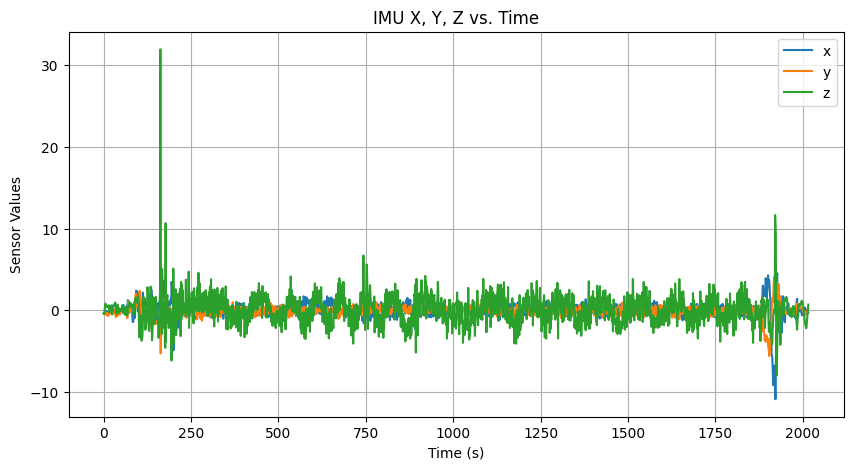

In [8]:
# Load IMU data, original version
df = pd.read_csv("1/Accelerometer.csv")  # Replace with your file name
print(df.head())  # Check the first few rows


# Plot directly
df[["x", "y", "z"]].plot(figsize=(10, 5), title="IMU X, Y, Z vs. Time")

# Show the plot
plt.xlabel("Time (s)")
plt.ylabel("Sensor Values")
plt.grid()
plt.show()


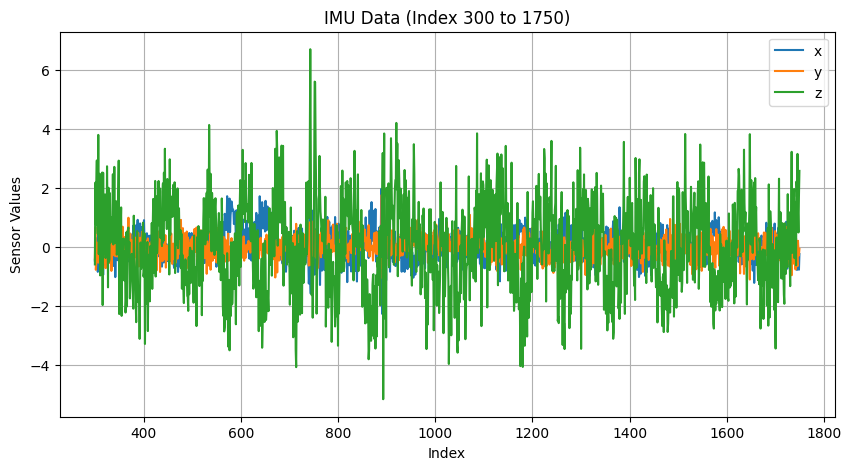

In [9]:
start_idx = 300  # Starting row index
end_idx = 1750    # Ending row index

# Filter using index range
df = df.iloc[start_idx:end_idx]

# Plot the trimmed data
df[["x", "y", "z"]].plot(figsize=(10, 5), title=f"IMU Data (Index {start_idx} to {end_idx})")
plt.xlabel("Index")
plt.ylabel("Sensor Values")
plt.grid()
plt.show()



Mean Δt: 0.014383363964641563 sec
Min Δt: 0.014383056640621561 sec
Max Δt: 0.014389160156248693 sec
Std Δt: 2.1135417749595588e-07 sec
Detected 1 outlier time differences outside (0.014383, 0.014384) sec
Outlier Timestamps:
[20.9212876]


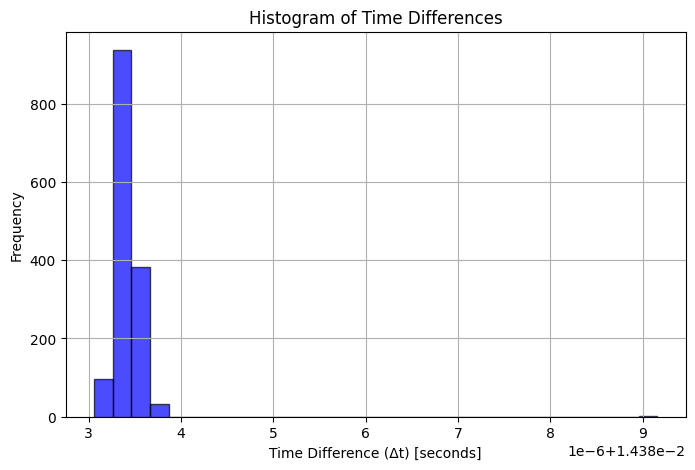

In [10]:
# Assuming the first column is timestamp in seconds
time = df.iloc[:, 1].values  

# Compute time differences (Δt)
time_diffs = np.diff(time)  # Difference between consecutive timestamps

# Print stats (optional)
print(f"Mean Δt: {np.mean(time_diffs)} sec")
print(f"Min Δt: {np.min(time_diffs)} sec")
print(f"Max Δt: {np.max(time_diffs)} sec")
print(f"Std Δt: {np.std(time_diffs)} sec")

std_dt = np.std(time_diffs)
mean_dt = np.mean(time_diffs)

# Define thresholds using 3 standard deviations (both upper and lower)
lower_threshold = mean_dt - 3 * std_dt
upper_threshold = mean_dt + 3 * std_dt

# Identify outliers (Δt values outside the expected range)
outliers = time_diffs[(time_diffs < lower_threshold) | (time_diffs > upper_threshold)]

print(f"Detected {len(outliers)} outlier time differences outside ({lower_threshold:.6f}, {upper_threshold:.6f}) sec")

# Get indices where time differences are outliers
outlier_indices = np.where((time_diffs < lower_threshold) | (time_diffs > upper_threshold))[0]

# Retrieve timestamps corresponding to those outliers
outlier_timestamps = time[outlier_indices + 1]  # Shift by +1 to get actual timestamps

print(f"Outlier Timestamps:\n{outlier_timestamps}")



# Plot histogram of time differences
plt.figure(figsize=(8, 5))
plt.hist(time_diffs, bins=30, color="blue", alpha=0.7, edgecolor="black")  # Adjust bins if needed
plt.xlabel("Time Difference (Δt) [seconds]")
plt.ylabel("Frequency")
plt.title("Histogram of Time Differences")
plt.grid(True)
plt.show()


In [11]:
# Compute Sampling Frequency (Fs)
Fs = 1 / np.mean(np.diff(time))  # Sample rate in Hz
print(f"Sampling Frequency: {Fs} Hz")
print(np.diff(time))

Sampling Frequency: 69.5247650312046 Hz
[0.01438354 0.0143833  0.0143833  ... 0.0143833  0.01438354 0.01438354]
